In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()

api.authenticate()

datasets = api.dataset_list(search='asaniczka/1-3m-linkedin-jobs-and-skills-2024')

for dataset in datasets:
    print(f"Title: {dataset.title}")
    print(f"Owner: {dataset.ownerName}")
    print(f"URL: https://www.kaggle.com/{dataset.ref}")
    print("\n")

# Download a dataset
# The first argument is the dataset identifier in the format of 'username/dataset'
# The second argument is the path where you want to download the dataset
api.dataset_download_files('asaniczka/1-3m-linkedin-jobs-and-skills-2024', path='C:/projects/linkedin-job-data-analysis/data/', unzip=True)

print("Dataset downloaded successfully!")


Title: 1.3M Linkedin Jobs & Skills (2024)
Owner: asaniczka
URL: https://www.kaggle.com/asaniczka/1-3m-linkedin-jobs-and-skills-2024


Dataset URL: https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
Dataset downloaded successfully!


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('C:/projects/linkedin-job-data-analysis/data/linkedin_job_postings.csv')

In [22]:
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [23]:
df1 = pd.read_csv('C:/projects/linkedin-job-data-analysis/data/job_summary.csv')

In [24]:
df1

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...
...,...,...
1297327,https://www.linkedin.com/jobs/view/roofing-sup...,We are currently seeking experienced commercia...
1297328,https://www.linkedin.com/jobs/view/service-cen...,Overview\nStable and growing organization\nCom...
1297329,https://www.linkedin.com/jobs/view/flight-qual...,Rôle et responsabilités\nJob Description:\nFli...
1297330,https://www.linkedin.com/jobs/view/global-sour...,Job Description\nAre You Ready to Make It Happ...


In [25]:
df2 = pd.read_csv('C:/projects/linkedin-job-data-analysis/data/job_skills.csv')

In [26]:
df2

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."
...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."


In [27]:
common = pd.merge(df, df2, on='job_link')

In [28]:
all = pd.merge(common, df1, on="job_link", how = 'inner')

In [29]:
all

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur...",Employment Type:\nFull time\nShift:\n12 Hour N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c...",TravelNurseSource is working with Adelphi Medi...
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est...",Want to learn more about this role and Jobot? ...
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o...",NEXDINE HOSPITALITY one of the nation's fastes...
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse...",TravelNurseSource is working with Alliant Pers...


In [30]:
all.isna().sum()
all = all.dropna()
all = all.drop(['got_summary', 'got_ner', 'is_being_worked'], axis=1)

In [31]:
all

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur...",Employment Type:\nFull time\nShift:\n12 Hour N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c...",TravelNurseSource is working with Adelphi Medi...
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est...",Want to learn more about this role and Jobot? ...
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o...",NEXDINE HOSPITALITY one of the nation's fastes...
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse...",TravelNurseSource is working with Alliant Pers...


In [32]:
all_filtered = all[all['job_title'].str.contains('machine learning engineer', case=False, na=False)]

In [33]:
all_filtered

,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
8344,https://www.linkedin.com/jobs/view/senior-mana...,2024-01-21 07:43:51.750033+00,"Senior Manager, Machine Learning Engineering",ClickJobs.io,"Hartford, CT",2024-01-14,Springfield,United States,Manager Records Analysis,Mid senior,Onsite,"Machine Learning, Software Development, Data E...","Center 1 (19052), United States of America, Mc..."
8629,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-20 01:38:06.100703+00,Senior Machine Learning Engineer,Jobs for Humanity,"Fredericksburg, VA",2024-01-14,Bowling Green,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Python, Scala, Java, Scikitl...",Company Description\nJobs for Humanity is part...
9419,https://www.linkedin.com/jobs/view/senior-full...,2024-01-20 00:19:29.360032+00,Senior Full-Stack Machine Learning Engineer- O...,GA-CCRi,"Charlottesville, VA",2024-01-14,Waynesboro,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Data Visualization, Python, ...",GA-CCRi maintains and deploys production syste...
10044,https://www.linkedin.com/jobs/view/staff-machi...,2024-01-19 12:20:05.536295+00,"Staff Machine Learning Engineer, Series A",Recruiting from Scratch,"Cincinnati, OH",2024-01-14,Cincinnati,United States,Test Fixture Designer,Mid senior,Onsite,"Machine Learning, Python, Numpy, Pandas, Jupyt...",This is for a client of Recruiting from Scratc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277917,https://www.linkedin.com/jobs/view/principal-m...,2024-01-21 02:35:01.233672+00,"Principal Machine Learning Engineer, ML Traini...",Snap Inc.,"Los Angeles, CA",2024-01-14,West Covina,United States,Electronics-Test Engineer,Mid senior,Onsite,"Machine Learning, Programming, Software Design...",Snap Inc is a technology company. We believe t...
1279163,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-19 16:23:18.179223+00,Senior Machine Learning Engineer,Jobs for Humanity,"Atlantic City, NJ",2024-01-14,Ocean City,United States,Computer Operator,Mid senior,Onsite,"Machine Learning, Data Engineering, Distribute...",Company Description\nJobs for Humanity is part...
1280072,https://www.linkedin.com/jobs/view/staff-machi...,2024-01-21 06:53:06.073787+00,"Staff Machine Learning Engineer, Series A",Recruiting from Scratch,"Torrance, CA",2024-01-16,Pasadena,United States,Programmer Engineering And Scientific,Mid senior,Onsite,"Machine Learning, Deep Learning, Python, Numpy...",This is for a client of Recruiting from Scratc...
1280949,https://www.linkedin.com/jobs/view/lead-machin...,2024-01-21 07:37:44.228487+00,"Lead Machine Learning Engineer (Bangkok based,...",Agoda,"Portland, OR",2024-01-14,Vancouver,United States,Computer Operator,Mid senior,Onsite,"Machine Learning, Data Warehousing, Software E...",About Agoda\nAgoda is an online travel booking...


In [34]:
def itr_skills(row):
    
    skills = row['job_skills'].split(', ')
    skills = [skills for skills in skills if len(skills) >= 3]
    
    return skills

all_filtered['skills'] = all_filtered.apply(itr_skills, axis=1)# applying function

all_filtered['skills_count'] = all_filtered['skills'].apply(len)

all_filtered.head(2)

C:\Users\adity\AppData\Local\Temp\ipykernel_29040\1164992107.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['skills'] = all_filtered.apply(itr_skills, axis=1)# applying function
C:\Users\adity\AppData\Local\Temp\ipykernel_29040\1164992107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['skills_count'] = all_filtered['skills'].apply(len)


,job_link,last_processed_time,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,skills,skills_count
182,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,"[Machine Learning, Programming, Python, Scala,...",27
8344,https://www.linkedin.com/jobs/view/senior-mana...,2024-01-21 07:43:51.750033+00,"Senior Manager, Machine Learning Engineering",ClickJobs.io,"Hartford, CT",2024-01-14,Springfield,United States,Manager Records Analysis,Mid senior,Onsite,"Machine Learning, Software Development, Data E...","Center 1 (19052), United States of America, Mc...","[Machine Learning, Software Development, Data ...",27


In [35]:
all_filtered.drop(['job_skills'], axis=1, inplace=True)
all_filtered = all_filtered.rename(columns={'skills': 'job_skills'})
all_filtered.set_index('company',inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_29040\3101984114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered.drop(['job_skills'], axis=1, inplace=True)


In [36]:
all_filtered = all_filtered.applymap(lambda s:s.lower() if type(s) == str else s)
all_filtered = all_filtered.replace({' & ': ' and '}, regex=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_29040\3254746762.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_filtered = all_filtered.applymap(lambda s:s.lower() if type(s) == str else s)


In [37]:
all_filtered.head(2)

,job_link,last_processed_time,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,job_skills,skills_count
company,,,,,,,,,,,,,
Jobs for Humanity,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,senior machine learning engineer,"new haven, ct",2024-01-14,east haven,united states,agricultural-research engineer,mid senior,onsite,company description\njobs for humanity is part...,"[Machine Learning, Programming, Python, Scala,...",27
ClickJobs.io,https://www.linkedin.com/jobs/view/senior-mana...,2024-01-21 07:43:51.750033+00,"senior manager, machine learning engineering","hartford, ct",2024-01-14,springfield,united states,manager records analysis,mid senior,onsite,"center 1 (19052), united states of america, mc...","[Machine Learning, Software Development, Data ...",27


In [38]:
all_filtered['first_seen'] = pd.to_datetime(all_filtered['first_seen'])
all_filtered['first_seen_date'] = all_filtered['first_seen'].dt.date

all_filtered['last_processed_time'] = all_filtered['last_processed_time'].astype(str)

all_filtered['last_processed_time'] = all_filtered['last_processed_time'].str.split(' ').str[0]
all_filtered['last_processed_time'] = pd.to_datetime(all_filtered['last_processed_time'])
all_filtered['process_duration'] = (all_filtered['last_processed_time'] - all_filtered['first_seen']).dt.days

In [39]:
all_filtered.head(2)

,job_link,last_processed_time,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,job_skills,skills_count,first_seen_date,process_duration
company,,,,,,,,,,,,,,,
Jobs for Humanity,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21,senior machine learning engineer,"new haven, ct",2024-01-14,east haven,united states,agricultural-research engineer,mid senior,onsite,company description\njobs for humanity is part...,"[Machine Learning, Programming, Python, Scala,...",27,2024-01-14,7
ClickJobs.io,https://www.linkedin.com/jobs/view/senior-mana...,2024-01-21,"senior manager, machine learning engineering","hartford, ct",2024-01-14,springfield,united states,manager records analysis,mid senior,onsite,"center 1 (19052), united states of america, mc...","[Machine Learning, Software Development, Data ...",27,2024-01-14,7


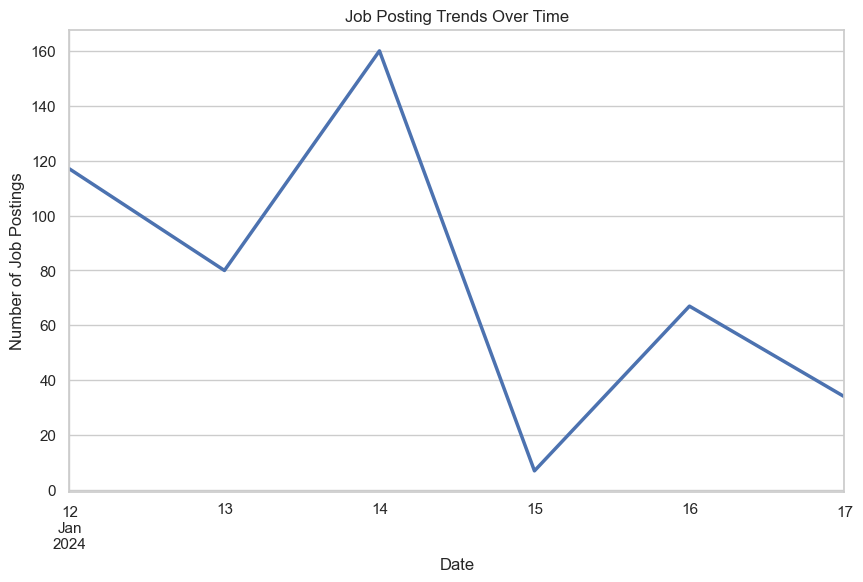

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
all_filtered['first_seen'].value_counts().sort_index().plot(kind='line', linewidth=2.5)
plt.title('Job Posting Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()

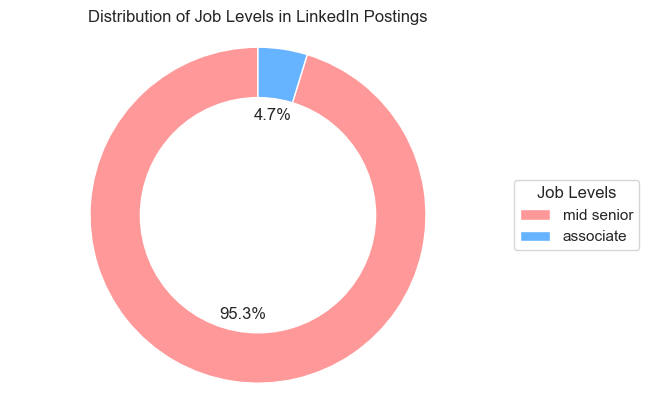

In [41]:
counts = all_filtered['job_level'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  

plt.legend(wedges, counts.index,
          title="Job Levels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Job Levels in LinkedIn Postings')
plt.show()

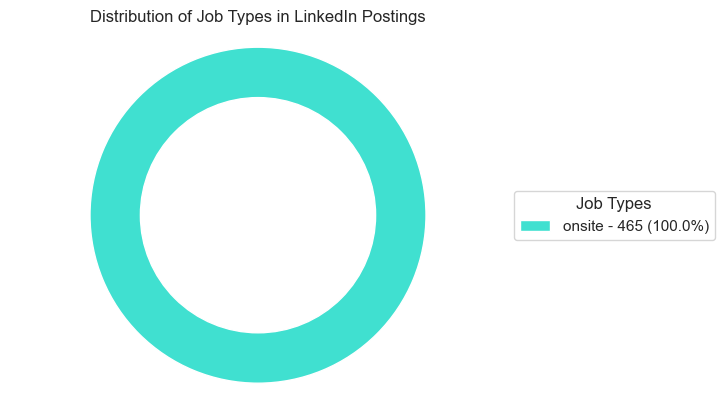

In [42]:
counts2 = all_filtered['job_type'].value_counts()


fig, ax = plt.subplots()
wedges, _ = ax.pie(counts2, startangle=90, colors=['#40E0D0','#FFD700','#FF6347'])


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  


labels = [f'{i} - {j} ({j/counts2.sum()*100:.1f}%)' for i,j in zip(counts2.index, counts2)]
plt.legend(wedges, labels,
          title="Job Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Job Types in LinkedIn Postings")
plt.show()

In [43]:
df = all_filtered

from collections import Counter

grouped_skills = df.groupby('job_title')['job_skills'].sum()

most_common_skills = grouped_skills.apply(lambda x: Counter(x).most_common(1))

data = []

for position, skills in most_common_skills.items():
    if skills:  
        data.append([position, skills[0][0], skills[0][1]])
    
df_most_common_skills = pd.DataFrame(data, columns=['job_title', 'Most Common Skill', 'Occurrences'])

In [44]:
df_most_common_skills.sort_values(by = 'Occurrences', ascending = False).head(10)

,job_title,Most Common Skill,Occurrences
87,"staff machine learning engineer, series a",Python,94
58,senior machine learning engineer - ai,Feature Engineering,62
52,senior machine learning engineer,Python,54
8,machine learning engineer,Machine Learning,40
69,"senior manager, machine learning engineering",Python,34
4,lead machine learning engineer,Python,34
82,staff machine learning engineer,Machine Learning,6
5,"lead machine learning engineer (bangkok based,...",Pyspark,6
41,principal machine learning engineer,Python,6
53,senior machine learning engineer (computer vis...,Python,5


In [45]:
flat_skills = [skill for skills in all_filtered['job_skills'] for skill in skills]

In [46]:
from collections import Counter
counts = Counter(flat_skills)    
common_skills = counts.most_common(10)
common_skills

[('Python', 400),
 ('Machine Learning', 342),
 ('PyTorch', 250),
 ('TensorFlow', 230),
 ('AWS', 167),
 ('Java', 142),
 ('Deep Learning', 141),
 ('Azure', 138),
 ('Scala', 121),
 ('Spark', 106)]

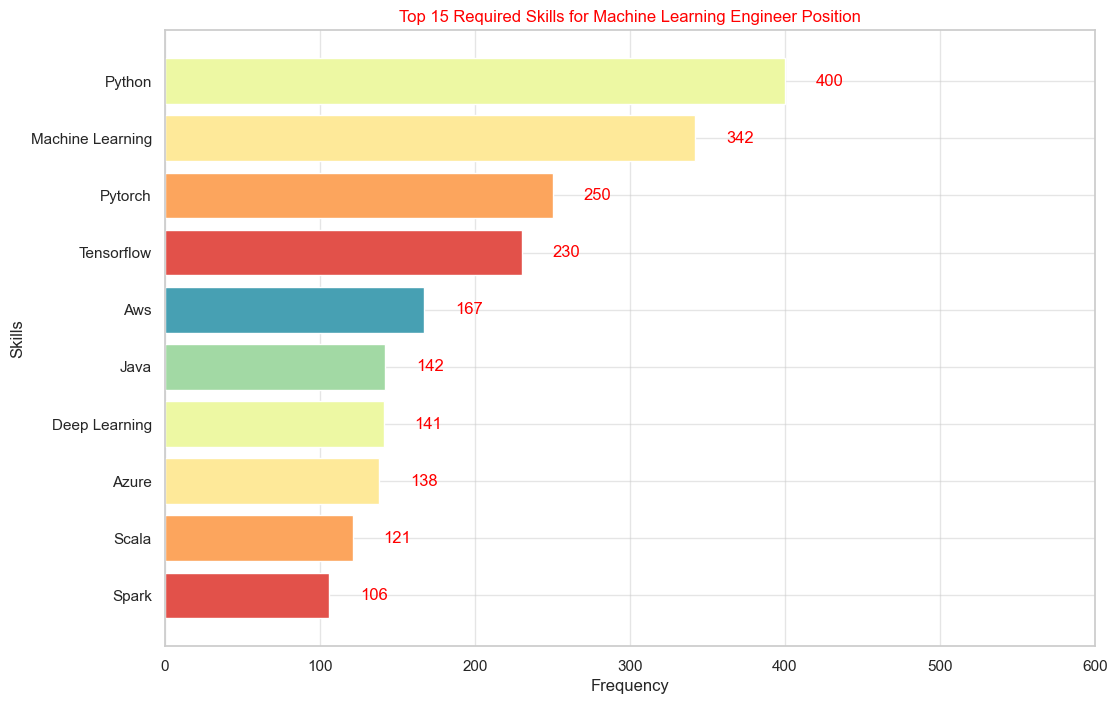

In [47]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 20
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='red')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 Required Skills for Machine Learning Engineer Position', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 600)
plt.show()

In [48]:
print(f"You need on average {int(all_filtered['skills_count'].median())} skills to apply for a Machine Learning Engineer job on LinkedIn")


You need on average 24 skills to apply for a Machine Learning Engineer job on LinkedIn
